In [457]:
import pandas as pd
import numpy as np

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
import spotipy.util as util

import time

import matplotlib.pyplot as plt


import seaborn as sns


from sklearn.preprocessing import MinMaxScaler



In [596]:
client_id = ''
    
client_secret = ''

username = ''

scope = ''

redirect_uri = ''

In [597]:
token = util.prompt_for_user_token(username, scope,
                                   client_id=client_id,
                                   client_secret=client_secret,
                                   redirect_uri=redirect_uri) 

sp = spotipy.Spotify(auth=token)

In [603]:
# choose an artist


name = "{The Big Takeover}" 

result = sp.search(name) 

result['tracks']['items'][3]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0eG4D3wgk21CQhqVsh0njZ'},
  'href': 'https://api.spotify.com/v1/artists/0eG4D3wgk21CQhqVsh0njZ',
  'id': '0eG4D3wgk21CQhqVsh0njZ',
  'name': 'The Big Takeover',
  'type': 'artist',
  'uri': 'spotify:artist:0eG4D3wgk21CQhqVsh0njZ'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5CT2hYT8j5uBMqTyMVp1kI'},
  'href': 'https://api.spotify.com/v1/artists/5CT2hYT8j5uBMqTyMVp1kI',
  'id': '5CT2hYT8j5uBMqTyMVp1kI',
  'name': 'Sugarshack Sessions',
  'type': 'artist',
  'uri': 'spotify:artist:5CT2hYT8j5uBMqTyMVp1kI'}]

In [604]:
# extract artist's uri
artist_uri = result['tracks']['items'][3]['artists'][0]['uri']

# pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album', offset=0, limit=50)
sp_albums_singles = sp.artist_albums(artist_uri, album_type='single', offset=0, limit=50)
sp_albums_compilation = sp.artist_albums(artist_uri, album_type='compilation', offset=0, limit=50)


# store album uris and name uris in separate lists
album_names = []
album_uris = []
album_dates = []

for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    album_dates.append(sp_albums['items'][i]['release_date'])

    
for i in range(len(sp_albums_singles['items'])):
    album_names.append(sp_albums_singles['items'][i]['name'])
    album_uris.append(sp_albums_singles['items'][i]['uri'])
    album_dates.append(sp_albums_singles['items'][i]['release_date'])    
    
for i in range(len(sp_albums_compilation['items'])):
    album_names.append(sp_albums_compilation['items'][i]['name'])
    album_uris.append(sp_albums_compilation['items'][i]['uri'])
    album_dates.append(sp_albums_compilation['items'][i]['release_date'])

In [605]:


def albumSongs(uri):
    
    album = uri #assign album uri to a_name

    spotify_albums[album] = {} #Creates dictionary for that specific album

#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []


    tracks = sp.album_tracks(album) #pull data on album tracks

    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])
        
        

In [606]:

print("LIST OF ALBUMS \n" )

spotify_albums = {}

album_count = 0

for i in album_uris: #each album
    
    albumSongs(i)
    
    print(str(album_names[album_count]))
    
    album_count+=1 #Updates album count once all tracks have been added

LIST OF ALBUMS 

Silly Girl
Children of the Rhythm
Tale of My Life
The Big Takeover Live at Sugarshack Sessions
Where Did I Go Wrong (Live @ Sugarshack Sessions)
Where Did I Go Wrong?
The Big Takeover on Audiotree Live
Shy
Girlie Girlie
Rainboots
Come Before Five


In [607]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [608]:
import time
import numpy as np

sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))


5 playlists completed
Loop #: 5
Elapsed Time: 15.457510709762573 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 22.785932779312134 seconds


In [609]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

51

In [610]:
df = pd.DataFrame.from_dict(dic_df)

df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Silly Girl,1,5SfaW0Dci9sgWTloIhjtIU,Rubber Biscuit,spotify:track:5SfaW0Dci9sgWTloIhjtIU,0.005550,0.455,0.886,0.002120,0.2830,-5.758,0.0417,160.419,0.880,3
1,Silly Girl,2,4XIlmXFG2dlRIeCGx4o6AY,Come Before Five,spotify:track:4XIlmXFG2dlRIeCGx4o6AY,0.049400,0.597,0.460,0.000004,0.0714,-8.805,0.1610,154.764,0.733,8
2,Silly Girl,3,1WN4oSH8Sv8NrAkj95JfzQ,Silly Girl,spotify:track:1WN4oSH8Sv8NrAkj95JfzQ,0.129000,0.648,0.735,0.000000,0.0876,-7.926,0.3810,145.293,0.730,4
3,Silly Girl,4,0bRd7cwhRHPuFSQYXs5Vyl,Love Understands,spotify:track:0bRd7cwhRHPuFSQYXs5Vyl,0.118000,0.690,0.759,0.000006,0.0664,-7.707,0.1120,120.916,0.861,5
4,Silly Girl,5,6QMwkFon2PgiONMAyDe8Oq,Sizzlin' Bacon II,spotify:track:6QMwkFon2PgiONMAyDe8Oq,0.037400,0.512,0.640,0.000003,0.0880,-6.151,0.0734,150.425,0.826,2
5,Silly Girl,6,6ibNP6MvulYZZNzKFbIfO0,Play Another Song,spotify:track:6ibNP6MvulYZZNzKFbIfO0,0.130000,0.723,0.875,0.000000,0.0567,-5.705,0.2040,125.530,0.842,3
6,Silly Girl,7,02a7Mj4Ie0JNgrb15oaXUA,Paddles,spotify:track:02a7Mj4Ie0JNgrb15oaXUA,0.164000,0.767,0.499,0.000000,0.0890,-10.295,0.0374,134.637,0.927,3
7,Silly Girl,8,7gJx3TmlPTTBpVlxBWaizE,Things You Do,spotify:track:7gJx3TmlPTTBpVlxBWaizE,0.023600,0.651,0.801,0.000002,0.0885,-5.759,0.0520,138.302,0.961,2
8,Silly Girl,9,5lQoY9ykw40nEqD4rdyIXo,Holiday,spotify:track:5lQoY9ykw40nEqD4rdyIXo,0.110000,0.724,0.833,0.000000,0.1190,-5.792,0.0407,133.567,0.966,2
9,Silly Girl,10,4oCkKA9SieBbNVlrDTQfJY,Cry,spotify:track:4oCkKA9SieBbNVlrDTQfJY,0.005510,0.796,0.616,0.010700,0.0557,-7.548,0.0601,94.418,0.823,2


In [463]:
#      df.to_csv('bigtakeover_discography.csv')


df = pd.read_csv('bigtakeover_discography.csv')

In [464]:
df.drop(['id','uri'], axis=1, inplace=True)

In [465]:
df

,Unnamed: 0,album,track_number,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0,Silly Girl,1,Rubber Biscuit,0.005550,0.455,0.886,0.002120,0.2830,-5.758,0.0417,160.419,0.880,3
1,1,Silly Girl,2,Come Before Five,0.049400,0.597,0.460,0.000004,0.0714,-8.805,0.1610,154.764,0.733,8
2,2,Silly Girl,3,Silly Girl,0.129000,0.648,0.735,0.000000,0.0876,-7.926,0.3810,145.293,0.730,4
3,3,Silly Girl,4,Love Understands,0.118000,0.690,0.759,0.000006,0.0664,-7.707,0.1120,120.916,0.861,5
4,4,Silly Girl,5,Sizzlin' Bacon II,0.037400,0.512,0.640,0.000003,0.0880,-6.151,0.0734,150.425,0.826,2
5,5,Silly Girl,6,Play Another Song,0.130000,0.723,0.875,0.000000,0.0567,-5.705,0.2040,125.530,0.842,3
6,6,Silly Girl,7,Paddles,0.164000,0.767,0.499,0.000000,0.0890,-10.295,0.0374,134.637,0.927,3
7,7,Silly Girl,8,Things You Do,0.023600,0.651,0.801,0.000002,0.0885,-5.759,0.0520,138.302,0.961,2
8,8,Silly Girl,9,Holiday,0.110000,0.724,0.833,0.000000,0.1190,-5.792,0.0407,133.567,0.966,2
9,9,Silly Girl,10,Cry,0.005510,0.796,0.616,0.010700,0.0557,-7.548,0.0601,94.418,0.823,2


In [466]:
df.describe(include=[np.object])

,album,name
count,51,51
unique,11,50
top,Children of the Rhythm,Come Before Five
freq,12,2


In [467]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,25.000000,5.078431,0.100350,0.646157,0.692588,0.036641,0.223663,-6.989059,0.129229,129.542706,0.775627,2.823529
std,14.866069,3.514787,0.145518,0.107496,0.150820,0.117497,0.206495,2.092025,0.090413,28.498137,0.126095,2.903142
min,0.000000,1.000000,0.000100,0.412000,0.356000,0.000000,0.027200,-12.926000,0.033300,60.821000,0.480000,0.000000
25%,12.500000,2.000000,0.008075,0.567000,0.590500,0.000000,0.082150,-7.988000,0.059600,114.029000,0.703000,1.000000
50%,25.000000,4.000000,0.032200,0.653000,0.728000,0.000047,0.140000,-6.958000,0.094100,134.883000,0.797000,2.000000
75%,37.500000,8.000000,0.131000,0.722000,0.812500,0.003555,0.272000,-5.533500,0.176000,145.477000,0.866000,3.500000
max,50.000000,12.000000,0.650000,0.880000,0.936000,0.589000,0.823000,-3.657000,0.403000,197.856000,0.966000,10.000000


In [468]:
duplicates = df[df.duplicated(['name'])]

duplicates

,Unnamed: 0,album,track_number,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
50,50,Come Before Five,1,Come Before Five,0.0462,0.587,0.426,0.000049,0.26,-9.753,0.17,154.857,0.759,1


In [469]:
df.iloc[50,3] = "Come Before Five (single)"

In [470]:
singles_df = df.iloc[47:51].append(df.iloc[40], ignore_index=True)
singles_df

,Unnamed: 0,album,track_number,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,47,Shy,1,Shy,0.07260,0.577,0.729,0.000007,0.231,-10.307,0.0583,98.837,0.775,8
1,48,Girlie Girlie,1,Girlie Girlie,0.01760,0.523,0.865,0.000003,0.273,-3.982,0.1420,78.950,0.824,5
2,49,Rainboots,1,Rainboots,0.00178,0.747,0.526,0.000097,0.318,-9.444,0.1380,145.995,0.835,8
3,50,Come Before Five,1,Come Before Five (single),0.04620,0.587,0.426,0.000049,0.260,-9.753,0.1700,154.857,0.759,1
4,40,Where Did I Go Wrong?,1,Where Did I Go Wrong?,0.02270,0.433,0.539,0.000000,0.237,-12.010,0.1300,143.064,0.778,6


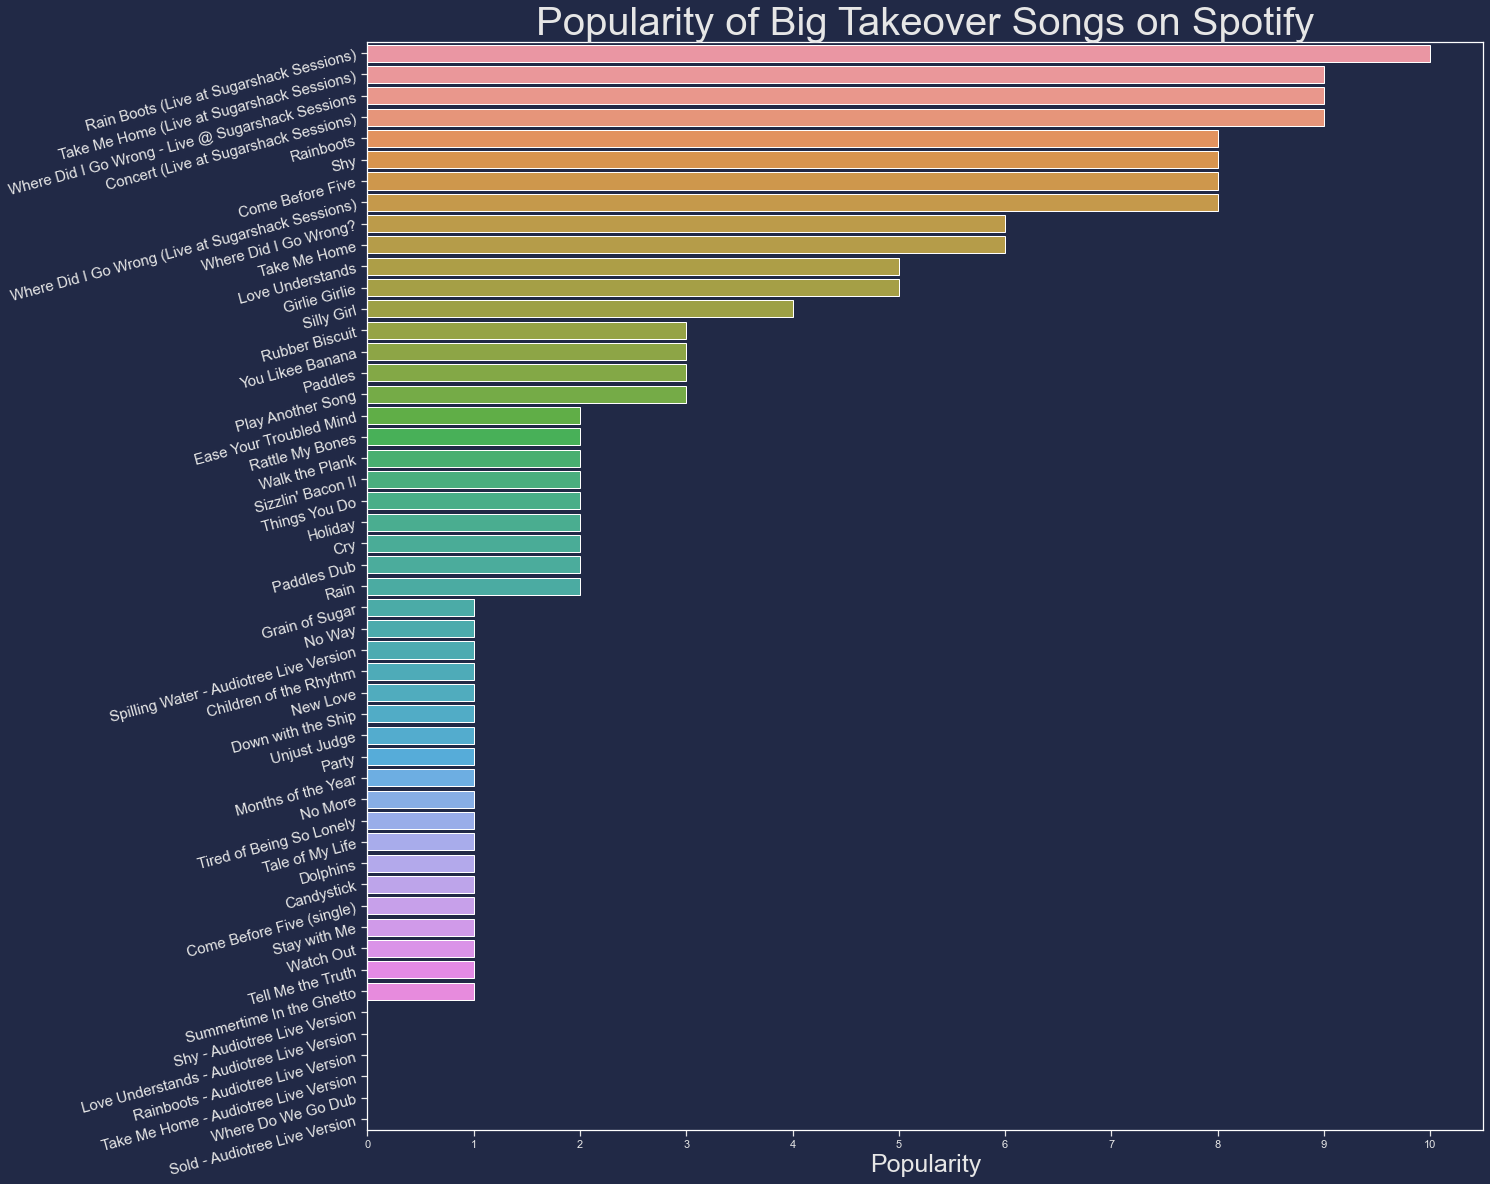

In [571]:
plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey


popular = df.sort_values(by='popularity', ascending=False)

plt.figure(figsize=(20, 20))

sns.barplot(y ='name', x ='popularity', data = popular, orient='h', ci=None)

plt.title('Popularity of Big Takeover Songs on Spotify', fontsize=40)
plt.xlabel('Popularity', fontsize=25)
plt.ylabel('')
plt.yticks(fontsize=15, rotation=15)
plt.xticks(np.arange(0,11,1))
plt.show()

In [472]:
silly_df = df[df['album']== 'Silly Girl']
children_df = df[df['album']== 'Children of the Rhythm']
tale_df = df[df['album']== 'Tale of My Life']
sugar_df = df[(df['album'] == 'The Big Takeover Live at Sugarshack Sessions') | (df['album'] == 'The Big Takeover Live @ Sugarshack Sessions')]
tree_df = df[df['album']== 'The Big Takeover on Audiotree Live']

silly = silly_df[['danceability', 'energy', 'valence', 'liveness', 'speechiness', 'instrumentalness', 'acousticness']]
children = children_df[['danceability', 'energy', 'valence', 'liveness', 'speechiness', 'instrumentalness', 'acousticness']]
tale = tale_df[['danceability', 'energy', 'valence', 'liveness', 'speechiness', 'instrumentalness', 'acousticness']]
sugar = sugar_df[['danceability', 'energy', 'valence', 'liveness', 'speechiness', 'instrumentalness', 'acousticness']]
tree = tree_df[['danceability', 'energy', 'valence', 'liveness', 'speechiness', 'instrumentalness', 'acousticness']]



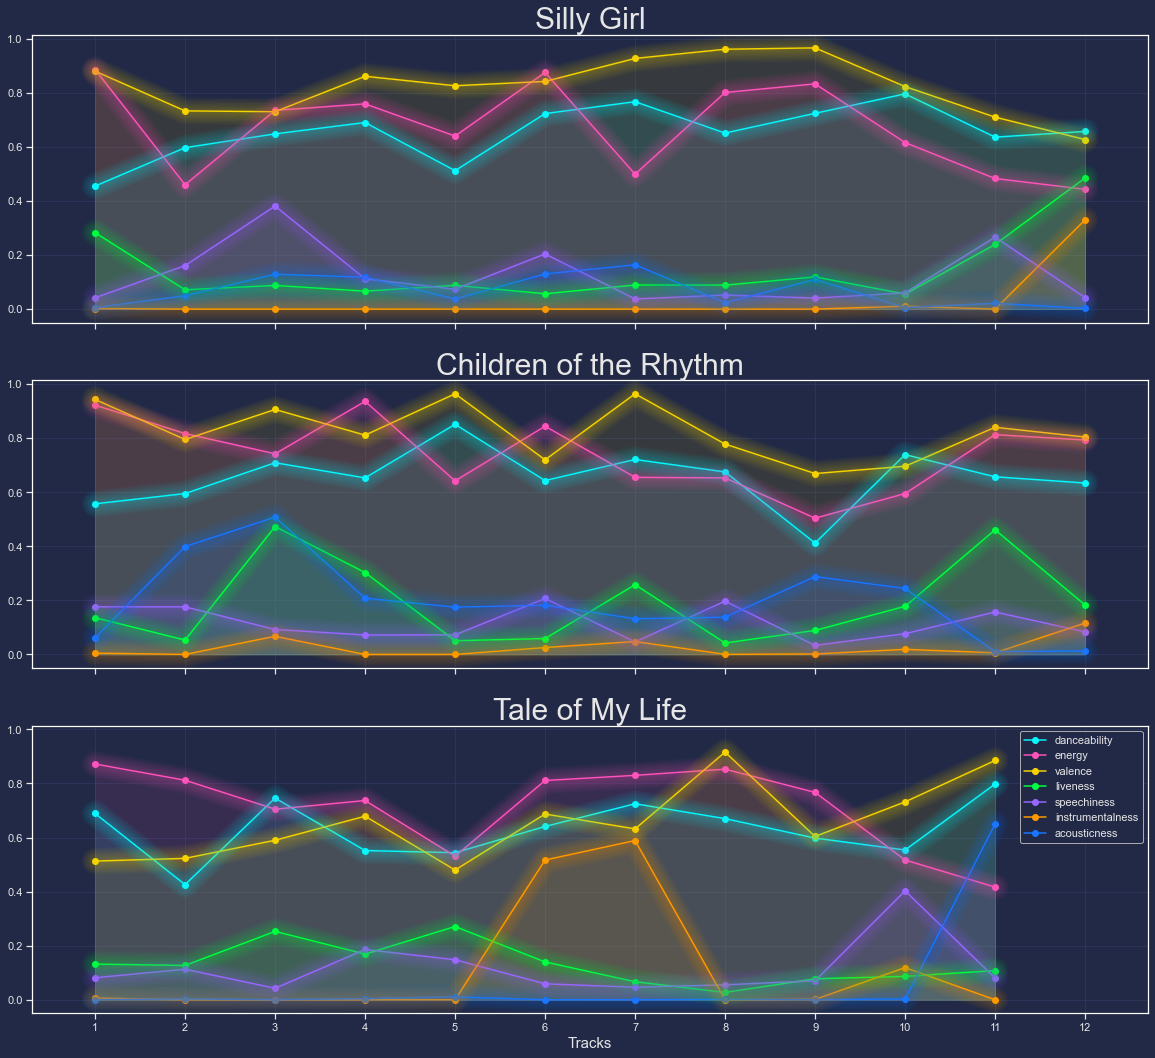

In [473]:
plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey


    
colors = [  
            '#08F7FE',  # cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green 
            '#9966ff',  # purple
            '#ff9900' , #orange
            '#1a75ff',  #blue
]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, sharey=True, sharex=True, figsize=(20,18))


silly.plot(marker='o', color=colors,legend=False, ax=ax1)

# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    silly.plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax1,
            color=colors)

# Color the areas below the lines:
for column, color in zip(silly, colors):
    ax1.fill_between(x=silly.index,
                    y1=silly[column].values,
                    y2=[0] * len(silly),
                    color=color,
                    alpha=0.1)
    
ax1.grid(color='#2A3459')
ax1.set_xlim(-0.5, 11.5)  # to not have the markers cut off
ax1.set_ylim(-0.05)
ax1.set_xlabel('Tracks', fontsize=15)
ax1.set_xticks(np.arange(1, 12, 1))
ax1.set_xticklabels(np.arange(1, 13, 1))
ax1.set_title('Silly Girl', fontsize=30)




children.reset_index(drop=True).plot(marker='o', color=colors,legend=False, ax=ax2)

# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.3 / n_shades

for n in range(1, n_shades+1):
    children.reset_index(drop=True).plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax2,
            color=colors)

# Color the areas below the lines:
for column, color in zip(children, colors):
    ax2.fill_between(x=children.reset_index(drop=True).index,
                    y1=children[column].values,
                    y2=[0] * len(children),
                    color=color,
                    alpha=0.1)

ax2.grid(color='#2A3459')
ax2.set_xlim(-0.5, 11.5)   # to not have the markers cut off
ax2.set_ylim(-0.05)
ax2.set_xlabel('Tracks', fontsize=15)
ax2.set_xticks(np.arange(0, 12, 1))
ax2.set_xticklabels(np.arange(1, 13, 1))
ax2.set_title('Children of the Rhythm', fontsize=30)




tale.reset_index(drop=True).plot(marker='o', color=colors, ax=ax3)

# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    tale.reset_index(drop=True).plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax3,
            color=colors)

# Color the areas below the lines:
for column, color in zip(tale, colors):
    ax3.fill_between(x=tale.reset_index(drop=True).index,
                    y1=tale[column].values,
                    y2=[0] * len(tale),
                    color=color,
                    alpha=0.1)
    
ax3.grid(color='#2A3459')
ax3.set_xlim([ax3.get_xlim()[0] - 0.2, ax3.get_xlim()[1] + 0.2])  # to not have the markers cut off
ax3.set_ylim(-0.05)
ax3.set_xlabel('Tracks', fontsize=15)
ax3.set_xticks(np.arange(0, 12, 1))
ax3.set_xticklabels(np.arange(1, 13, 1))
ax3.set_title('Tale of My Life', fontsize=30)


plt.show()

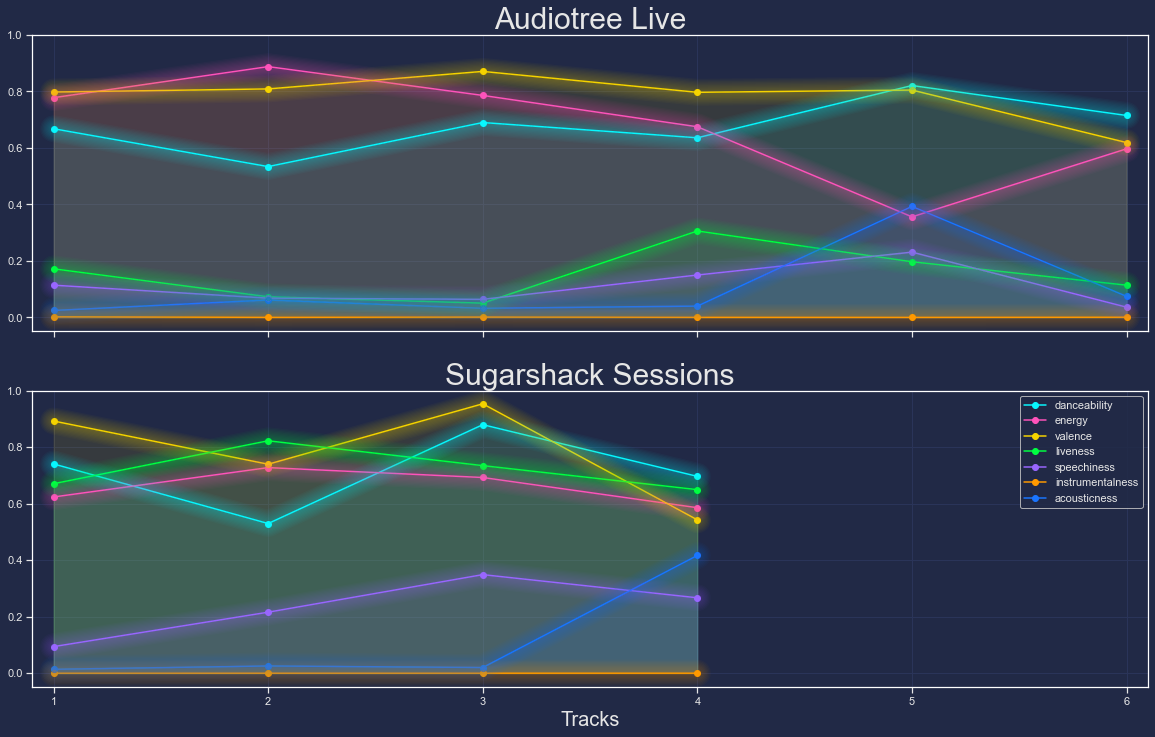

In [474]:
plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey


    
colors = [  
            '#08F7FE',  # cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green 
            '#9966ff',  # purple
            '#ff9900' , #orange
            '#1a75ff',  #blue
]

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharey=True, sharex=True, figsize=(20,12))



tree.reset_index(drop=True).plot(marker='o', color=colors,legend=False, ax=ax1)

# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.3 / n_shades

for n in range(1, n_shades+1):
    tree.reset_index(drop=True).plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax1,
            color=colors)

# Color the areas below the lines:
for column, color in zip(tree, colors):
    ax1.fill_between(x=tree.reset_index(drop=True).index,
                    y1=tree[column].values,
                    y2=[0] * len(tree),
                    color=color,
                    alpha=0.1)

ax1.grid(color='#2A3459')
ax1.set_xlim(-0.1, 5.1)   # to not have the markers cut off
ax1.set_ylim(-0.05, 1)
ax1.set_xlabel('Tracks', fontsize=20)
ax1.set_xticks(np.arange(0, 6, 1))
ax1.set_xticklabels(np.arange(1, 7, 1))
ax1.set_title('Audiotree Live', fontsize=30)



sugar.reset_index(drop=True).plot(marker='o', color=colors,legend=True, ax=ax2)

# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    sugar.reset_index(drop=True).plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax2,
            color=colors)

# Color the areas below the lines:
for column, color in zip(sugar.reset_index(drop=True), colors):
    ax2.fill_between(x=sugar.reset_index(drop=True).index,
                    y1=sugar.reset_index(drop=True)[column].values,
                    y2=[0] * len(sugar.reset_index(drop=True)),
                    color=color,
                    alpha=0.1)
    
ax2.grid(color='#2A3459')
ax2.set_xlim(-0.1, 5.1)  # to not have the markers cut off
ax2.set_ylim(-0.05, 1)
ax2.set_xlabel('Tracks', fontsize=20)
ax2.set_xticks(np.arange(0, 6, 1))
ax2.set_xticklabels(np.arange(1, 7, 1))
ax2.set_title('Sugarshack Sessions', fontsize=30)


plt.show()

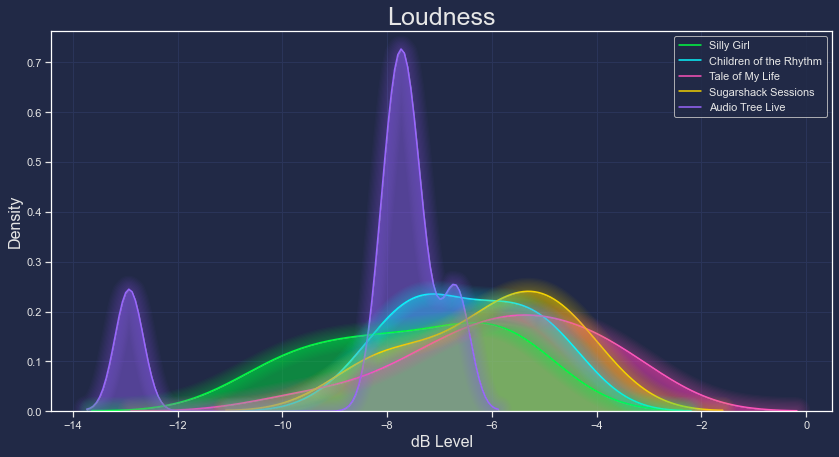

In [475]:
plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey




fig = plt.figure(figsize=(14,7))

sns.kdeplot(silly_df['loudness'], label='Silly Girl', shade = True, color = '#00ff41' )
sns.kdeplot(children_df['loudness'], label='Children of the Rhythm', shade = True, color = '#08F7FE' )
sns.kdeplot(tale_df['loudness'], label='Tale of My Life', shade = True, color = '#FE53BB' )
sns.kdeplot(sugar_df['loudness'], label='Sugarshack Sessions', shade = True, color = '#F5D300' )
sns.kdeplot(tree_df['loudness'], label='Audio Tree Live', shade = True, color = '#9966ff' )


# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    sns.kdeplot(silly_df['loudness'], label='Silly Girl',linewidth=2+(diff_linewidth*n),
                alpha=alpha_value, shade = True, color = '#00ff41', legend=False )
    sns.kdeplot(children_df['loudness'], label='Children of the Rhythm', linewidth=2+(diff_linewidth*n), 
                alpha=alpha_value, shade = True, color = '#08F7FE' , legend=False )
    sns.kdeplot(tale_df['loudness'], label='Tale of My Life', linewidth=2+(diff_linewidth*n), 
                alpha=alpha_value, shade = True, color = '#FE53BB', legend=False  )
    sns.kdeplot(sugar_df['loudness'], label='Sugarshack Sessions',linewidth=2+(diff_linewidth*n), 
                alpha=alpha_value, shade = True, color = '#F5D300', legend=False  )
    sns.kdeplot(tree_df['loudness'], label='Audio Tree Live', linewidth=2+(diff_linewidth*n), 
                alpha=alpha_value, shade = True, color = '#9966ff', legend=False  )

plt.grid(color='#2A3459')    
plt.title('Loudness', fontsize = 25)
plt.xlabel('dB Level', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.show()

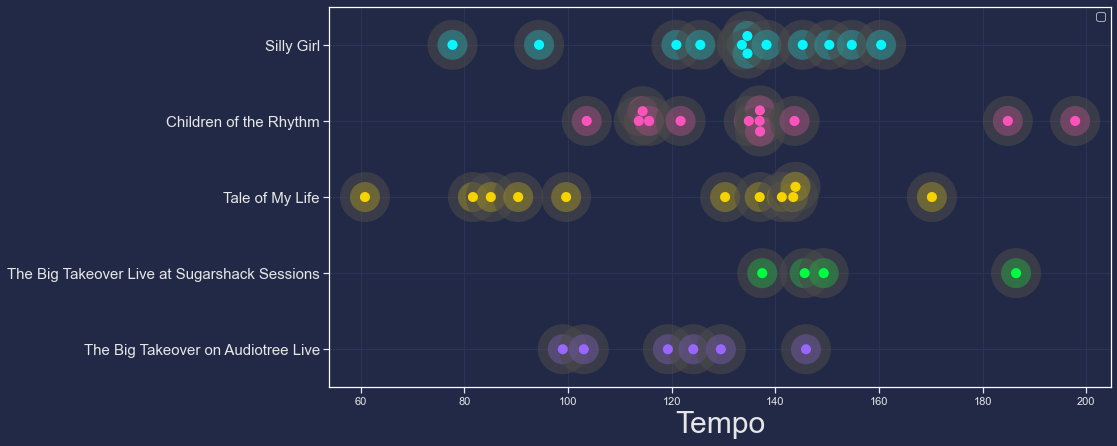

In [476]:



plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey



fig = plt.figure(figsize=(14,7))

colors = [  
            '#08F7FE',  # teal/cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green 
            '#9966ff',  # purple
            '#ff9900' , #orange
]

data = silly_df.append(children_df, ignore_index=True).append(tale_df, ignore_index=True).append(sugar_df, ignore_index=True).append(tree_df, ignore_index=True)


sns.swarmplot(x='tempo', y='album', data=data, hue='album', palette =colors, size=30, 
              linewidth = -20, alpha=0.6)
    
sns.swarmplot(x='tempo', y='album', data=data, hue='album', palette =colors, size=10)

plt.grid(color='#2A3459')  
plt.legend('')
plt.xlabel('Tempo', fontsize=30)
plt.ylabel('')
plt.yticks(fontsize=15)

plt.show()


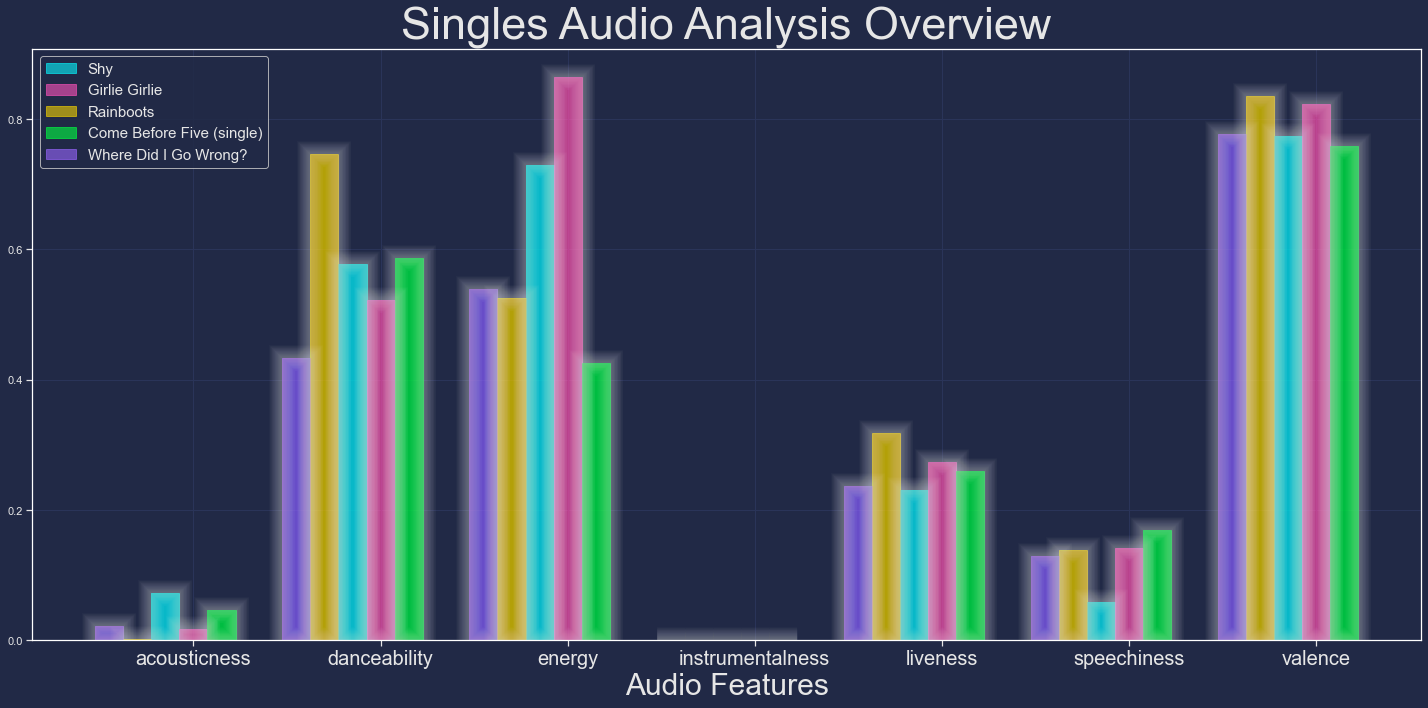

In [577]:

data = singles_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]

colors = [  
            '#08F7FE',  # teal/cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green 
            '#9966ff',  # purple
            '#ff9900' , #orange
]


# create plot
fig, ax = plt.subplots(figsize=(20, 10))

n_groups = 7
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.6

plt.bar(index, data.iloc[0], bar_width, align='center',
        alpha=opacity,
        color=colors[0], edgecolor = colors[0],
        label= singles_df['name'][0])


plt.bar(index + bar_width, data.iloc[1], bar_width, align='center',
        alpha=opacity,
        color=colors[1], edgecolor = colors[1],
        label= singles_df['name'][1])

plt.bar(index - bar_width, data.iloc[2], bar_width, align='center',
        alpha=opacity,
        color=colors[2], edgecolor = colors[2],
        label= singles_df['name'][2])


plt.bar(index + 2 * bar_width, data.iloc[3], bar_width, align='center',
        alpha=opacity,
        color=colors[3], edgecolor = colors[3],
        label= singles_df['name'][3])

plt.bar(index - 2 * bar_width, data.iloc[4], bar_width, align='center',
        alpha=opacity,
        color=colors[4], edgecolor = colors[4],
        label= singles_df['name'][4])


# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 20
diff_linewidth = 1.2
alpha_value = 0.4 / n_shades

for n in range(1, n_shades+1):
    plt.bar(index, data.iloc[0], bar_width, align='center',
        color=colors[0],
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)

    plt.bar(index + bar_width, data.iloc[1], bar_width, align='center',
        color=colors[1], 
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)
    
    plt.bar(index - bar_width, data.iloc[2], bar_width, align='center',
        color=colors[2],
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)    

    plt.bar(index + 2 * bar_width, data.iloc[3], bar_width, align='center',
        color=colors[3],
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)

    plt.bar(index - 2 * bar_width, data.iloc[4], bar_width, align='center',
        color=colors[4],
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)


plt.grid(color='#2A3459') 
plt.ylabel('')
plt.xlabel('Audio Features', fontsize=30)
plt.title('Singles Audio Analysis Overview', fontsize=45)
plt.xticks(index + bar_width, data.columns, fontsize=20)
plt.legend(fontsize=15)

plt.tight_layout()
plt.show()

In [481]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[['tempo', 'loudness']])

scaled_data = pd.DataFrame(scaled_data, columns = ['tempo', 'loudness'])

scaled_singles = scaled_data.iloc[47:51].append(scaled_data.iloc[40], ignore_index=True)

singles_df = singles_df.join(scaled_singles, how='outer',rsuffix='_scaled')

singles_df

,Unnamed: 0,album,track_number,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,tempo_scaled,loudness_scaled
0,47,Shy,1,Shy,0.07260,0.577,0.729,0.000007,0.231,-10.307,0.0583,98.837,0.775,8,0.277418,0.282555
1,48,Girlie Girlie,1,Girlie Girlie,0.01760,0.523,0.865,0.000003,0.273,-3.982,0.1420,78.950,0.824,5,0.132295,0.964937
2,49,Rainboots,1,Rainboots,0.00178,0.747,0.526,0.000097,0.318,-9.444,0.1380,145.995,0.835,8,0.621549,0.375661
3,50,Come Before Five,1,Come Before Five (single),0.04620,0.587,0.426,0.000049,0.260,-9.753,0.1700,154.857,0.759,1,0.686219,0.342324
4,40,Where Did I Go Wrong?,1,Where Did I Go Wrong?,0.02270,0.433,0.539,0.000000,0.237,-12.010,0.1300,143.064,0.778,6,0.600161,0.098824


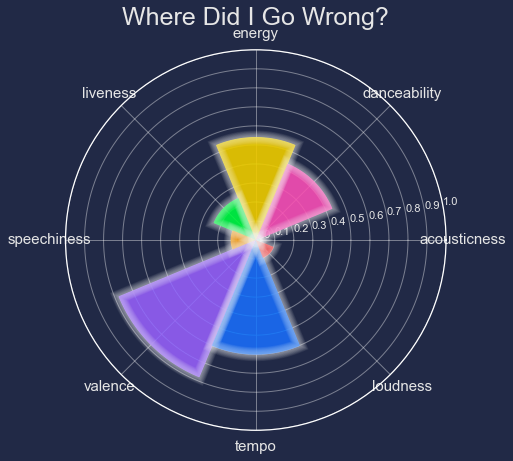

In [591]:

data = singles_df[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo_scaled', 'loudness_scaled']]


theta = np.arange(0,(2 * np.pi) , ((2 * np.pi)/8))

radii =  data.iloc[4]

width = np.pi /4

colors = [  
            '#08F7FE',  # cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green 
            '#ff9900' , #orange
            '#9966ff',  # purple
            '#1a75ff',  #blue
             '#ff3333' , #red
]


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

plt.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.8, edgecolor=colors)

n_shades = 10
diff_linewidth = 1.2
alpha_value = 0.6 / n_shades

for n in range(1, n_shades+1):
    plt.bar(theta, radii, width=width, bottom=0.0, color=colors, edgecolor='white', 
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)

plt.grid(alpha=0.4)    
ax.set_xticklabels(['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo', 'loudness'], fontsize=15)    
ax.set_rlabel_position(10)
ax.set_rticks(np.arange(0,1.1, 0.1))
plt.title('Where Did I Go Wrong?', fontsize = 25)
plt.show()

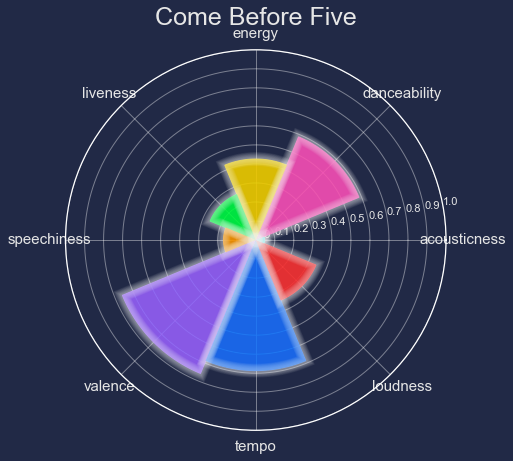

In [592]:
data = singles_df[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo_scaled', 'loudness_scaled']]


theta = np.arange(0,(2 * np.pi) , ((2 * np.pi)/8))

radii =  data.iloc[3]

width = np.pi /4

colors = [  
            '#08F7FE',  # cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green 
            '#ff9900' , #orange
            '#9966ff',  # purple
            '#1a75ff',  #blue
             '#ff3333' , #red
]


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

plt.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.8, edgecolor=colors)

n_shades = 10
diff_linewidth = 1.2
alpha_value = 0.6 / n_shades

for n in range(1, n_shades+1):
    plt.bar(theta, radii, width=width, bottom=0.0, color=colors, edgecolor='white', 
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)

plt.grid(alpha=0.4)    
ax.set_xticklabels(['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo', 'loudness'], fontsize=15)    
ax.set_rticks(np.arange(0,1.1, 0.1))
ax.set_rlabel_position(10) 
plt.title('Come Before Five', fontsize = 25)
plt.show()

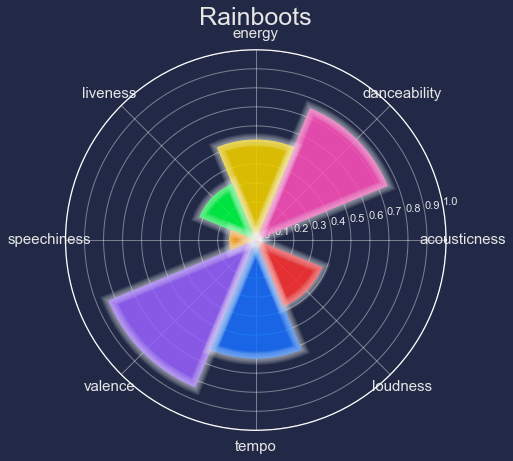

In [593]:
data = singles_df[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo_scaled', 'loudness_scaled']]


theta = np.arange(0,(2 * np.pi) , ((2 * np.pi)/8))

radii =  data.iloc[2]

width = np.pi /4

colors = [  
            '#08F7FE',  # cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green 
            '#ff9900' , #orange
            '#9966ff',  # purple
            '#1a75ff',  #blue
             '#ff3333' , #red
]


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

plt.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.8, edgecolor=colors)

n_shades = 10
diff_linewidth = 1.2
alpha_value = 0.6 / n_shades

for n in range(1, n_shades+1):
    plt.bar(theta, radii, width=width, bottom=0.0, color=colors, edgecolor='white', 
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)

plt.grid(alpha=0.4)    
ax.set_xticklabels(['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo', 'loudness'], fontsize=15)    
ax.set_rticks(np.arange(0,1.1, 0.1))
ax.set_rlabel_position(10) 
plt.title('Rainboots', fontsize = 25)
plt.show()

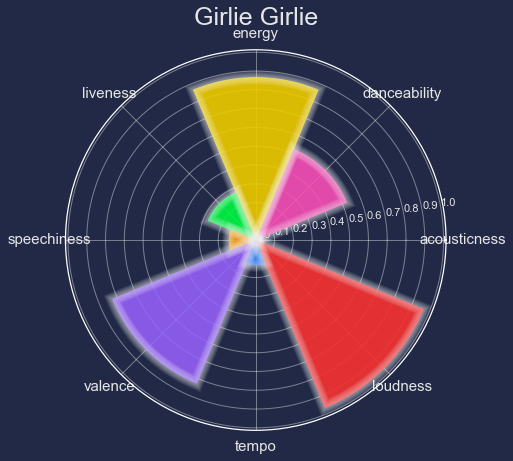

In [594]:
data = singles_df[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo_scaled', 'loudness_scaled']]


theta = np.arange(0,(2 * np.pi) , ((2 * np.pi)/8))

radii =  data.iloc[1]

width = np.pi /4

colors = [  
            '#08F7FE',  # cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green 
            '#ff9900' , #orange
            '#9966ff',  # purple
            '#1a75ff',  #blue
             '#ff3333' , #red
]


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

plt.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.8, edgecolor=colors)

n_shades = 10
diff_linewidth = 1.2
alpha_value = 0.6 / n_shades

for n in range(1, n_shades+1):
    plt.bar(theta, radii, width=width, bottom=0.0, color=colors, edgecolor='white', 
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)

plt.grid(alpha=0.4)    
ax.set_xticklabels(['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo', 'loudness'], fontsize=15)    
ax.set_rticks(np.arange(0,1.1, 0.1))
ax.set_rlabel_position(10) 
plt.title('Girlie Girlie', fontsize = 25)
plt.show()

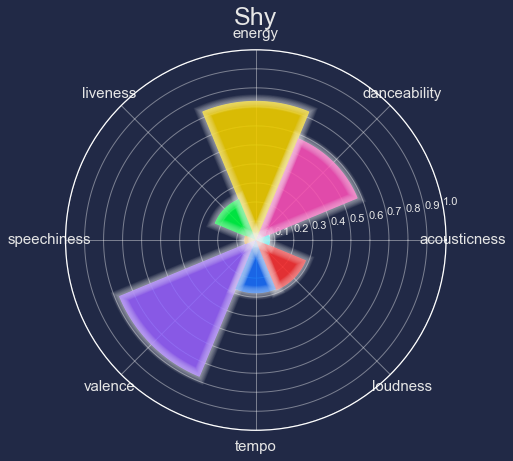

In [595]:
data = singles_df[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo_scaled', 'loudness_scaled']]


theta = np.arange(0,(2 * np.pi) , ((2 * np.pi)/8))

radii =  data.iloc[0]

width = np.pi /4

colors = [  
            '#08F7FE',  # cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green 
            '#ff9900' , #orange
            '#9966ff',  # purple
            '#1a75ff',  #blue
             '#ff3333' , #red
]


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

plt.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.8, edgecolor=colors)

n_shades = 10
diff_linewidth = 1.2
alpha_value = 0.6 / n_shades

for n in range(1, n_shades+1):
    plt.bar(theta, radii, width=width, bottom=0.0, color=colors, edgecolor='white', 
        linewidth=2+(diff_linewidth*n),
        alpha=alpha_value)

plt.grid(alpha=0.4)    
ax.set_xticklabels(['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence', 'tempo', 'loudness'], fontsize=15)    
ax.set_rticks(np.arange(0,1.1, 0.1))
ax.set_rlabel_position(10) 
plt.title('Shy', fontsize = 25)
plt.show()